<a href="https://colab.research.google.com/github/DishaAndre/Adv_DSA_Sem4/blob/main/Star_Type_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [77]:
# Load the dataset into a DataFrame
df = pd.read_csv('/content/sample_data/star_type_dataset.csv')

In [78]:
# View the first 5 rows
print("--- First 5 rows of the dataset ---")
print(df.head())

--- First 5 rows of the dataset ---
   Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  Absolute Magnitude (Mv)  \
0             3882           0.002749       0.116150                11.232131   
1             4866           0.234267       0.682442                 6.405724   
2             8340           0.001363       0.017720                11.993847   
3             7176           3.828776       1.268587                 3.372350   
4             6412       37938.044899     158.163228                -6.617687   

          Color Spectral Class      Galaxy Constellation  \
0        Orange              K   Andromeda        Cygnus   
1        Orange              K   Milky Way    Ursa Major   
2         White              A  Triangulum    Cassiopeia   
3  Yellow-White              F   Milky Way       Pegasus   
4  Yellow-White              F   Milky Way          Lyra   

   Age (in million years)  Metallicity ([Fe/H])  Rotational Velocity (km/s)  \
0             2072.429337            

In [79]:
# View the last 5 rows
print("--- Last 5 rows of the dataset ---")
print(df.tail())

--- Last 5 rows of the dataset ---
       Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  \
14995             3011           0.003677       0.223288   
14996             3150           0.030142       0.584141   
14997             3356           0.002185       0.138551   
14998             2432           0.000993       0.177900   
14999             6087           0.000392       0.017850   

       Absolute Magnitude (Mv)         Color Spectral Class      Galaxy  \
14995                10.916341           Red            NaN  Triangulum   
14996                 8.632081           Red              M    Sombrero   
14997                11.481512           Red              M    Sombrero   
14998                12.337265           Red              M    Sombrero   
14999                13.345582  Yellow-White              F   Andromeda   

      Constellation  Age (in million years)  Metallicity ([Fe/H])  \
14995    Cassiopeia             2804.458113             -0.023119   
14996        Aq

In [80]:
# View a random sample of rows
print("--- Random 5 rows from the dataset ---")
print(df.sample(5))

--- Random 5 rows from the dataset ---
       Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  \
3096              5904           0.538911       0.703106   
5282              8523           0.001420       0.017319   
13575             8321           0.000454       0.010278   
4874              8476           0.000509       0.010482   
14503             4053           0.069837       0.537087   

       Absolute Magnitude (Mv)   Color Spectral Class     Galaxy  \
3096                  5.501208  Yellow              G  Whirlpool   
5282                 11.949269   White              A  Milky Way   
13575                13.186385   White              A   Sombrero   
4874                 13.063566   White              A  Andromeda   
14503                 7.719786  Orange              K  Milky Way   

      Constellation  Age (in million years)  Metallicity ([Fe/H])  \
3096           Lyra             7775.632881             -0.814611   
5282           Lyra            12274.083297          

In [81]:
# Get the shape (number of rows and columns) of the dataset
print("Shape of the dataset:")
print(df.shape)

Shape of the dataset:
(15000, 14)


In [82]:
# Get a concise summary of the DataFrame
print("--- Concise summary of the DataFrame ---")
df.info()

--- Concise summary of the DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Temperature (K)             15000 non-null  int64  
 1   Luminosity (L/Lo)           15000 non-null  float64
 2   Radius (R/Ro)               15000 non-null  float64
 3   Absolute Magnitude (Mv)     15000 non-null  float64
 4   Color                       14700 non-null  object 
 5   Spectral Class              14700 non-null  object 
 6   Galaxy                      15000 non-null  object 
 7   Constellation               15000 non-null  object 
 8   Age (in million years)      14700 non-null  float64
 9   Metallicity ([Fe/H])        14700 non-null  float64
 10  Rotational Velocity (km/s)  14700 non-null  float64
 11  Distance (light years)      14700 non-null  float64
 12  Star Type ID                15000 non-null  int

In [83]:
# Get descriptive statistics for numerical columns
print("--- Descriptive statistics for numerical columns ---")
print(df.describe())

--- Descriptive statistics for numerical columns ---
       Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  \
count     15000.000000       1.500000e+04   15000.000000   
mean       5738.729600       2.824617e+06      62.489976   
std        4654.715091       3.791049e+07     209.684482   
min         800.000000       1.980002e-06       0.008004   
25%        3214.000000       5.192790e-03       0.231031   
50%        4552.000000       3.148912e-02       0.488588   
75%        6623.000000       1.429226e+00       1.174739   
max       49776.000000       1.490263e+09    1997.561669   

       Absolute Magnitude (Mv)  Age (in million years)  Metallicity ([Fe/H])  \
count             15000.000000            14700.000000          14700.000000   
mean                  6.216801             5616.860567             -0.019922   
std                   7.177768             4143.699246              0.362477   
min                 -18.103157                1.012774             -1.599612   
25%   

In [84]:
# Check for missing values in each column
print("--- Missing values count in each column ---")
print(df.isnull().sum())

--- Missing values count in each column ---
Temperature (K)                 0
Luminosity (L/Lo)               0
Radius (R/Ro)                   0
Absolute Magnitude (Mv)         0
Color                         300
Spectral Class                300
Galaxy                          0
Constellation                   0
Age (in million years)        300
Metallicity ([Fe/H])          300
Rotational Velocity (km/s)    300
Distance (light years)        300
Star Type ID                    0
Star Type                       0
dtype: int64


In [85]:
# Identify columns with missing values
numerical_cols_with_missing = ['Age (in million years)', 'Metallicity ([Fe/H])',
                               'Rotational Velocity (km/s)', 'Distance (light years)']

categorical_cols_with_missing = ['Color', 'Spectral Class']

In [86]:
# Handle missing numerical values by filling with the median
for col in numerical_cols_with_missing:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value) # Corrected line: Re-assign the column
    print(f"Filled missing values in '{col}' with median: {median_value:.4f}")

# Handle missing categorical values by filling with the mode
for col in categorical_cols_with_missing:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value) # Corrected line: Re-assign the column
    print(f"Filled missing values in '{col}' with mode: {mode_value}")

Filled missing values in 'Age (in million years)' with median: 5386.7872
Filled missing values in 'Metallicity ([Fe/H])' with median: -0.0017
Filled missing values in 'Rotational Velocity (km/s)' with median: 9.3076
Filled missing values in 'Distance (light years)' with median: 1023.5106
Filled missing values in 'Color' with mode: Red
Filled missing values in 'Spectral Class' with mode: M


In [87]:
# Verify that all missing values have been handled
print("--- Missing values count after handling ---")
print(df.isnull().sum())

--- Missing values count after handling ---
Temperature (K)               0
Luminosity (L/Lo)             0
Radius (R/Ro)                 0
Absolute Magnitude (Mv)       0
Color                         0
Spectral Class                0
Galaxy                        0
Constellation                 0
Age (in million years)        0
Metallicity ([Fe/H])          0
Rotational Velocity (km/s)    0
Distance (light years)        0
Star Type ID                  0
Star Type                     0
dtype: int64


In [88]:
# Check for duplicate rows
print("--- Number of duplicate rows ---")
print(f"Total duplicate rows: {df.duplicated().sum()}")

# Drop duplicate rows if they exist
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print("\n--- Duplicate rows removed. ---")
    print(f"Remaining number of rows: {len(df)}")

--- Number of duplicate rows ---
Total duplicate rows: 0


In [89]:
print("Shape of the dataset:")
print(df.shape)

Shape of the dataset:
(15000, 14)


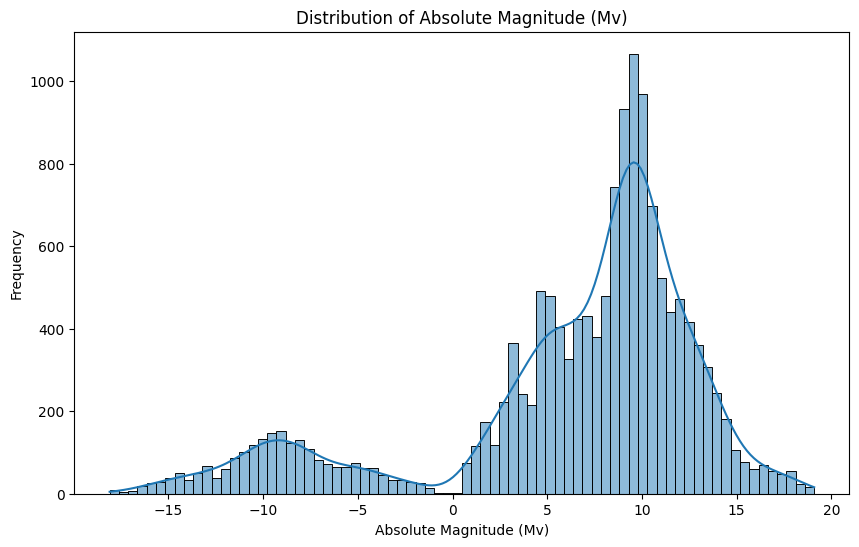

In [90]:
# Plot the distribution of our regression target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Absolute Magnitude (Mv)'], kde=True)
plt.title('Distribution of Absolute Magnitude (Mv)')
plt.xlabel('Absolute Magnitude (Mv)')
plt.ylabel('Frequency')
plt.show()

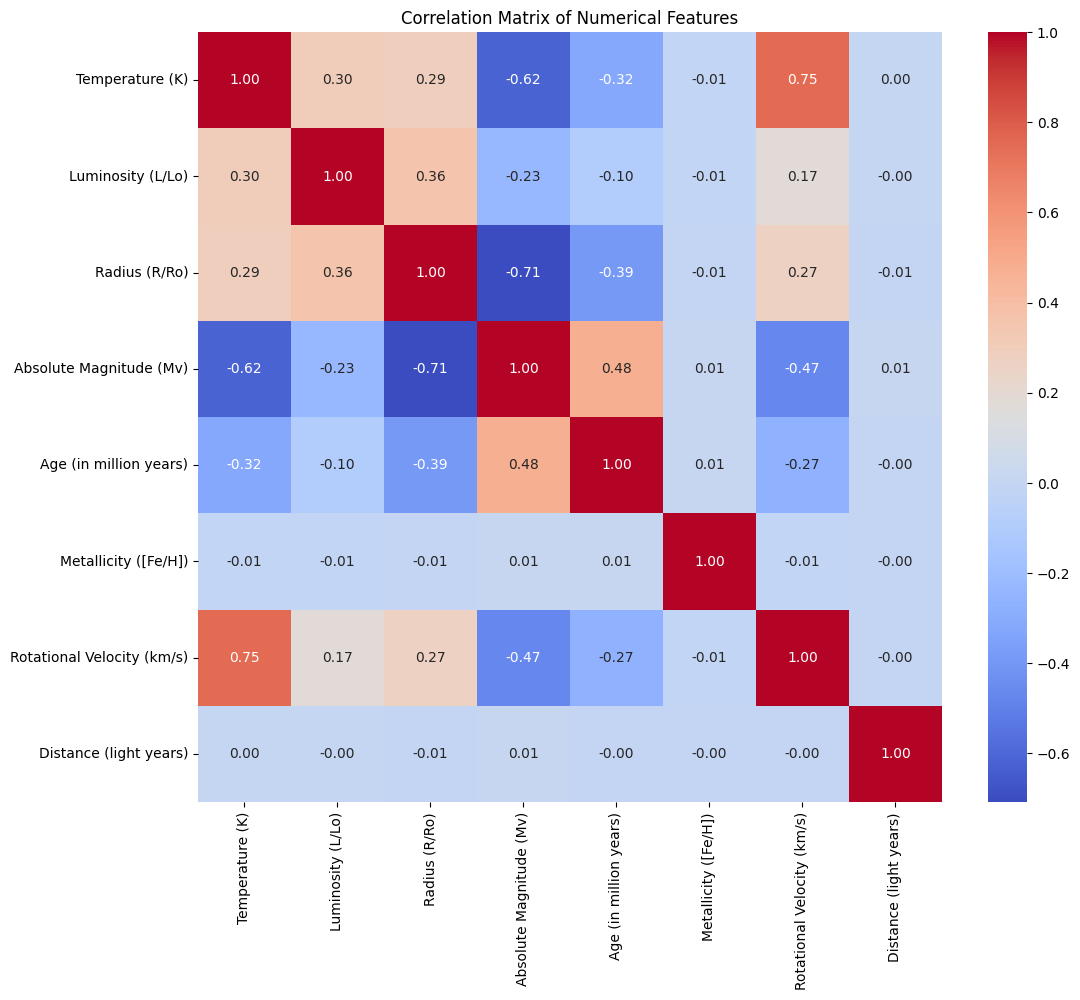

In [91]:
# Create a correlation heatmap of numerical features
numerical_cols = ['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute Magnitude (Mv)',
                  'Age (in million years)', 'Metallicity ([Fe/H])', 'Rotational Velocity (km/s)', 'Distance (light years)']

plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

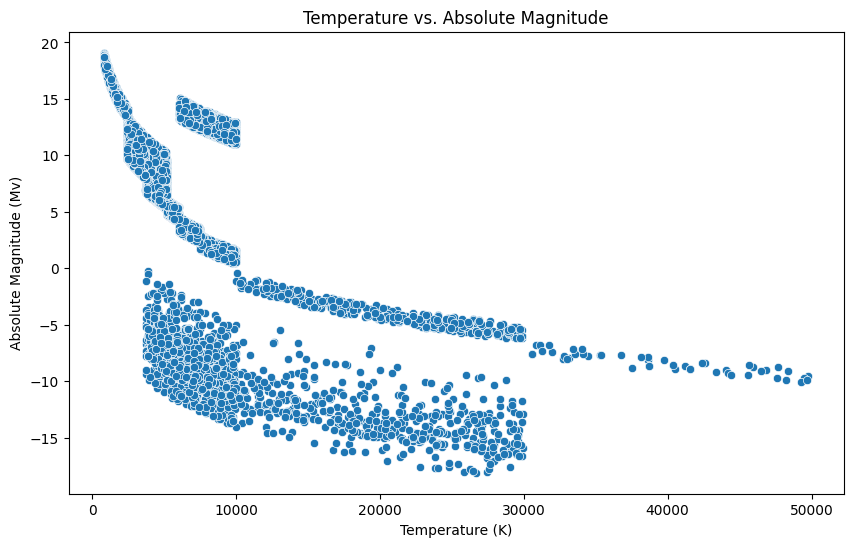

In [92]:
# Visualize the relationship between 'Temperature' and 'Absolute Magnitude'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature (K)', y='Absolute Magnitude (Mv)', data=df)
plt.title('Temperature vs. Absolute Magnitude')
plt.xlabel('Temperature (K)')
plt.ylabel('Absolute Magnitude (Mv)')
plt.show()

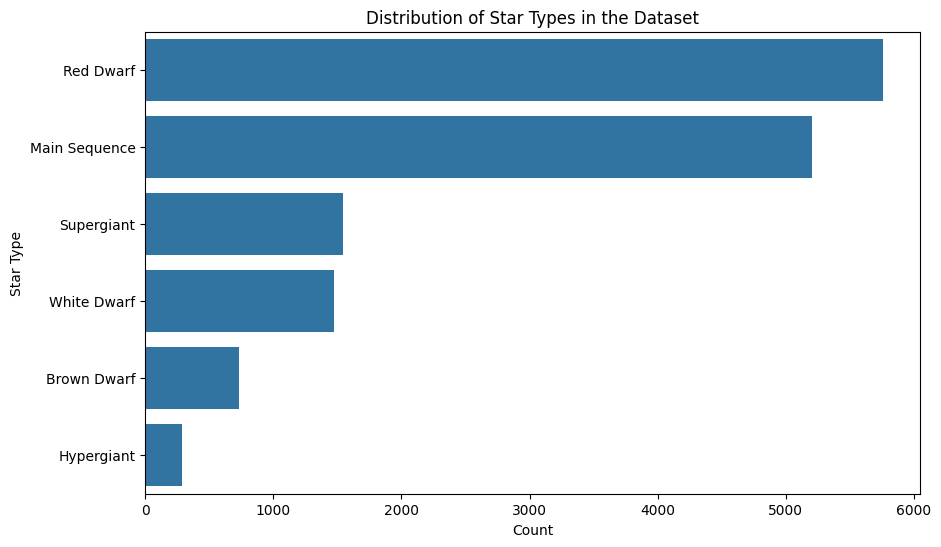

In [93]:
# Assuming you have the 'df' DataFrame ready
plt.figure(figsize=(10, 6))
sns.countplot(y='Star Type', data=df, order=df['Star Type'].value_counts().index)
plt.title('Distribution of Star Types in the Dataset')
plt.xlabel('Count')
plt.ylabel('Star Type')
plt.show()

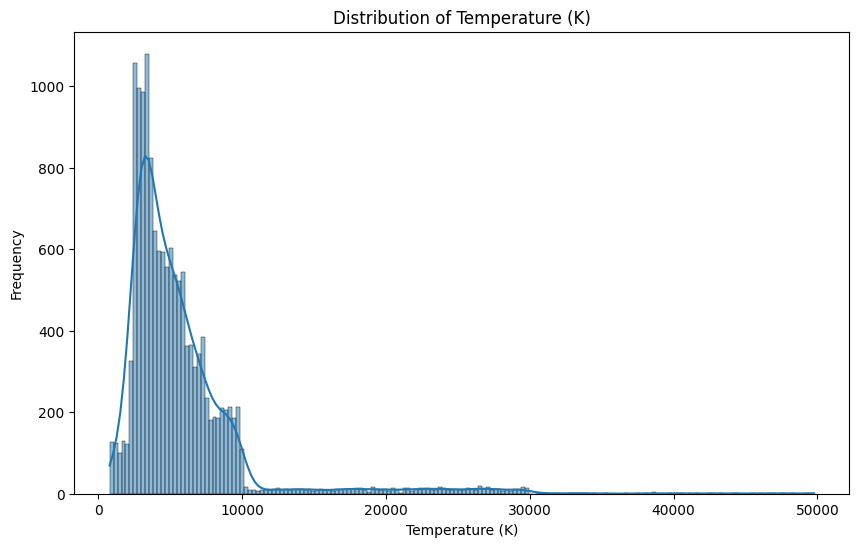

In [94]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature (K)'], kde=True)
plt.title('Distribution of Temperature (K)')
plt.xlabel('Temperature (K)')
plt.ylabel('Frequency')
plt.show()

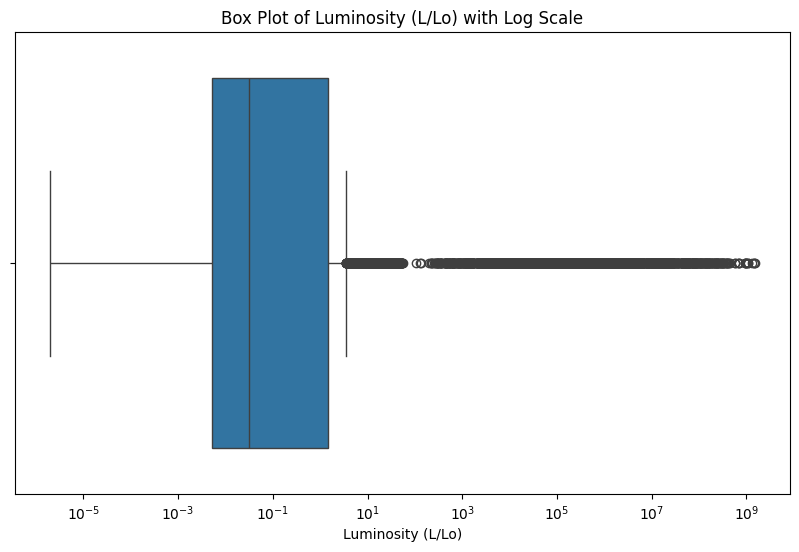

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Luminosity (L/Lo)'])
plt.xscale('log') # This line applies the logarithmic scale
plt.title('Box Plot of Luminosity (L/Lo) with Log Scale')
plt.xlabel('Luminosity (L/Lo)')
plt.show()

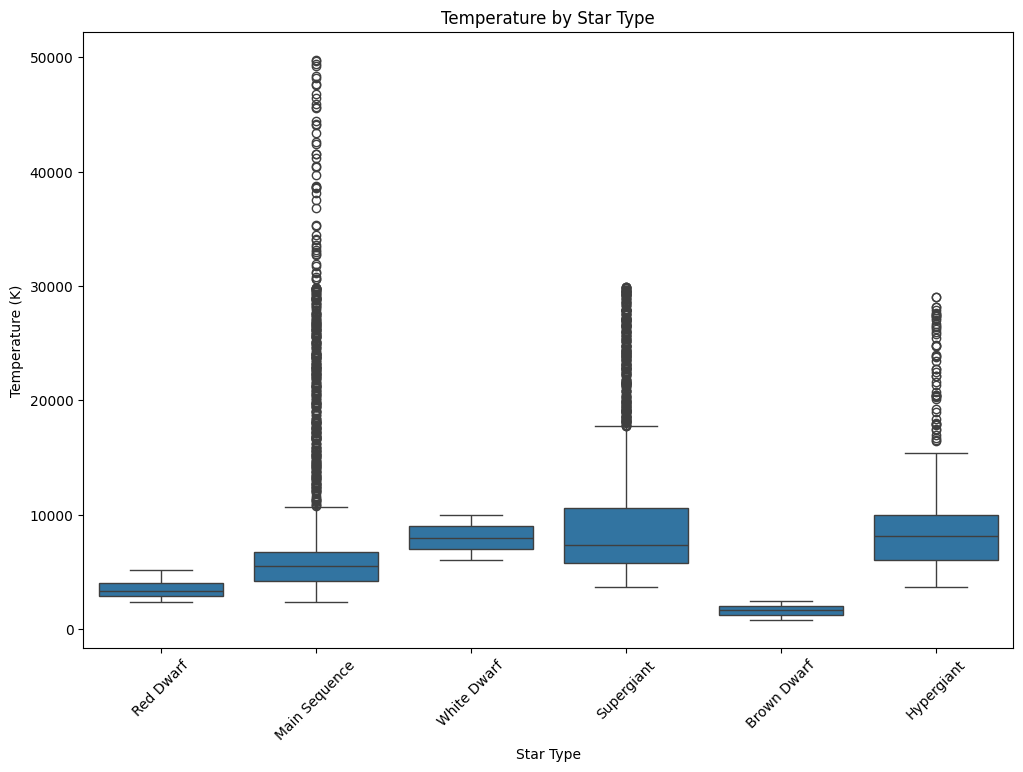

In [96]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Star Type', y='Temperature (K)', data=df)
plt.title('Temperature by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Temperature (K)')
plt.xticks(rotation=45)
plt.show()

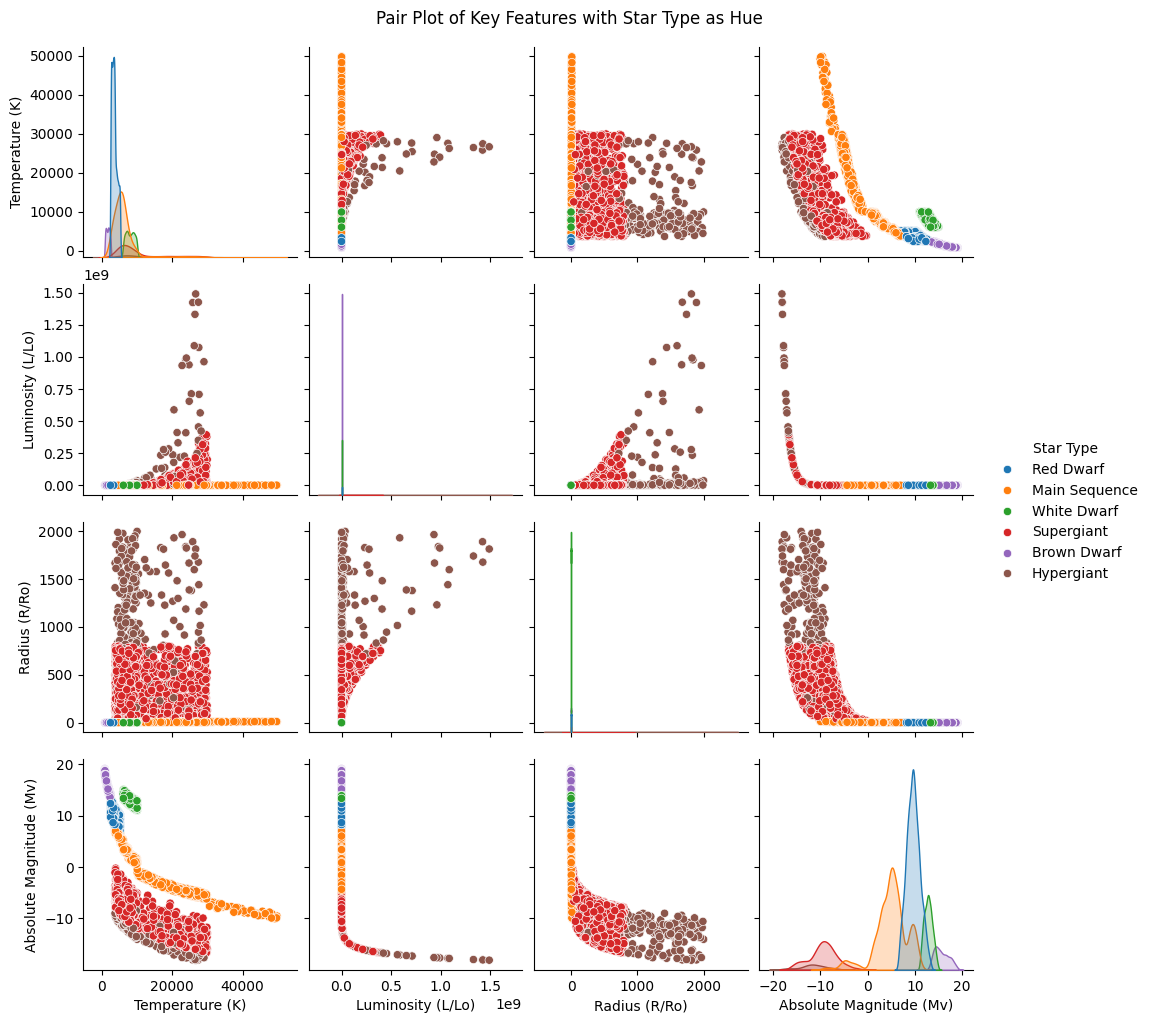

In [97]:
# We'll use a subset of numerical columns for a clearer plot
numerical_subset = ['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute Magnitude (Mv)']
sns.pairplot(df, vars=numerical_subset, hue='Star Type')
plt.suptitle('Pair Plot of Key Features with Star Type as Hue', y=1.02)
plt.show()

In [98]:
# Assuming you have the 'df' DataFrame ready with filled missing values

# --- STEP 1: OUTLIER REMOVAL ---

# Calculate the first quartile (Q1) and third quartile (Q3) for Luminosity
Q1 = df['Luminosity (L/Lo)'].quantile(0.25)
Q3 = df['Luminosity (L/Lo)'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without the outliers
df_processed = df[
    (df['Luminosity (L/Lo)'] >= lower_bound) &
    (df['Luminosity (L/Lo)'] <= upper_bound)
].copy()

print("--- Outlier Removal First Workflow ---")
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_processed)}")

--- Outlier Removal First Workflow ---
Original number of rows: 15000
Number of rows after removing outliers: 11721


In [99]:
# --- STEP 2: ENCODING ---

# Define features (X) and target (y) from the new, processed DataFrame
X = df_processed.drop(columns=['Absolute Magnitude (Mv)', 'Star Type ID', 'Star Type'])
y = df_processed['Absolute Magnitude (Mv)']

# Identify categorical columns that need to be encoded
categorical_cols = ['Color', 'Spectral Class', 'Galaxy', 'Constellation']

# Use One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded_part = encoder.fit_transform(X[categorical_cols])

# Convert the encoded array to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded_part, columns=encoder.get_feature_names_out(categorical_cols), index=X.index)

# Drop the original categorical columns and concatenate the new encoded columns
X_final = pd.concat([X.drop(columns=categorical_cols), X_encoded_df], axis=1)

print("Final preprocessed features (X) shape:", X_final.shape)
print("Final target (y) shape:", y.shape)

Final preprocessed features (X) shape: (11721, 31)
Final target (y) shape: (11721,)


In [100]:
# --- 1. Split the Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

print("--- Data Splitting Complete ---")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

--- Data Splitting Complete ---
Shape of X_train: (9376, 31)
Shape of X_test: (2345, 31)
Shape of y_train: (9376,)
Shape of y_test: (2345,)


In [101]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

print("--- Data Splitting Complete ---")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Instantiate and train the Linear Regression model
model = LinearRegression()
print("\n--- Training the Linear Regression model... ---")
model.fit(X_train, y_train)
print("--- Model training complete. ---")

# Make predictions on the test set for evaluation
y_pred = model.predict(X_test)

--- Data Splitting Complete ---
Shape of X_train: (9376, 31)
Shape of X_test: (2345, 31)
Shape of y_train: (9376,)
Shape of y_test: (2345,)

--- Training the Linear Regression model... ---
--- Model training complete. ---


In [102]:
# Calculate key regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


--- Model Evaluation ---
Mean Squared Error (MSE): 0.5915
Mean Absolute Error (MAE): 0.5689
Root Mean Squared Error (RMSE): 0.7691
R-squared (R²): 0.9342


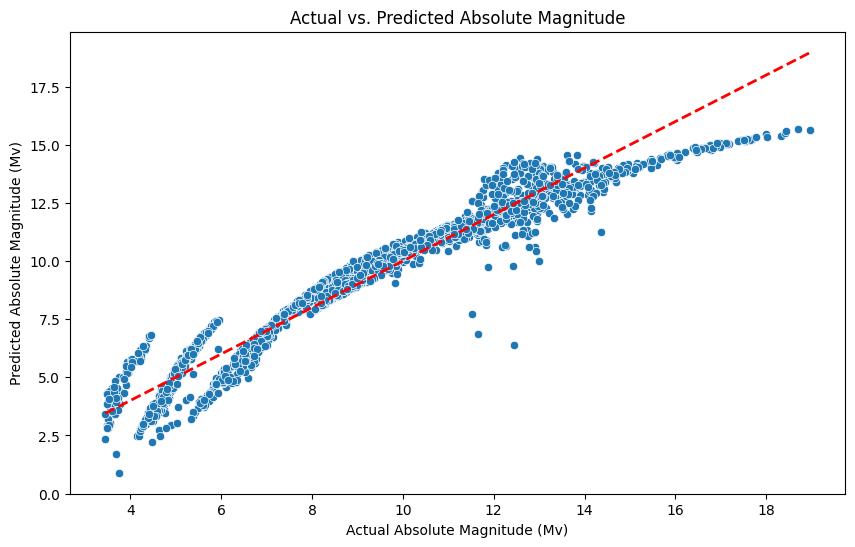

In [103]:
# Visualize the predicted vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)

# Add a line representing a perfect prediction (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Absolute Magnitude')
plt.xlabel('Actual Absolute Magnitude (Mv)')
plt.ylabel('Predicted Absolute Magnitude (Mv)')
plt.show()